## Visualizaciones de flujos de eventos y evolucion del convertions rate.
-  Año 2020
- Segmentaciones por Paises, Ciudades, Meses y Semanas

In [1]:
import pandas as pd
import os
import codecs
import csv

import numpy as np
import matplotlib.pyplot as plt

import sys
import random
import copy

In [2]:
def readCsv(path):

    os.chdir(path)
    system = {}

    onlyfiles = [f for f in os.listdir() if os.path.isfile(f)]

    #print(onlyfiles)
    for f in onlyfiles:
        system[f] = pd.read_csv(f, encoding='utf8')

    return onlyfiles, system

In [4]:
def removeCols(df, col_lst : list):

    schp_year_cols = list(df.columns)
    for col in col_lst:
        selc_cols = schp_year_cols.remove(col)
    schp_year = df[schp_year_cols]

    return schp_year


In [5]:
def firstInform(df):
    # Analizamos actividad max y min de los eventos.
    for col in df.columns:
        mx_t = max(df[col])
        countMounth_max = list(df[col].loc[df[col] == mx_t].index)
        maxMounth = str(countMounth_max[0][1])
        maxCounty = str(countMounth_max[0][0])

        mi_t = min(df[col])
        countMounth_min = list(df[col].loc[df[col] == mi_t].index)
        minMounth = str(countMounth_min[0][1])
        minCounty = str(countMounth_min[0][0])

        av_t = np.mean(df[col])
        va_t = np.var(df["total_sessions"])

        print("########################################################")
        print("Valor max de la columna '{0}' es: '{1}' \n para pais: '{2}' y fecha:'{3}'".format(col, mx_t, maxCounty,maxMounth))
        print("Valor min de la columna '{0}' es: '{1}' \n para pais: '{2}' y fecha:'{3}'".format(col, mi_t, minCounty,minMounth))
        print("Valor medio de la columna %s es: %s" % (col, av_t))
        print("Valor varianza de la columna %s es: %s" % (col, va_t))
        print("########################################################")


In [6]:
def segmenConv(df):

    msk_conversions = df["total_conversion"] == 0
    shpYco_0 = df[msk_conversions]
    msk_conversions = df["total_conversion"] != 0
    shpYco_1 = df[msk_conversions]

    return shpYco_0, shpYco_1

In [7]:
def plot_Bars(df, titulo: str):
    ind = df.index  # the x locations for the groups
    width = 0.35
    fig1, ax1 = plt.subplots(figsize=(20, 20), sharex=True)

    for cont in df.columns:
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        ax1.bar(ind, df[cont], width, color=color)

    ax1.set_ylabel(titulo)
    ax1.legend(labels=df.columns)
    plt.show()

In [8]:
def bar_tru(df, nor: int):
    # Reducimos el valor de la columna total_sessions
    df_c = copy.copy(df)
    df_c["total_sessions"] = df_c["total_sessions"] / nor

    # Pintamos grafica de barras
    plot_Bars(df_c, "Por paises")

    df_t = df_c.T
    # Pintamos grafica de barras de df trans.
    plot_Bars(df_t, "Por eventos")

In [9]:
def setColor(column):
    
    if column == "total_sessions":
        color = 'g'
    elif column == "total_carts":
        color = 'r'
    elif column == "total_checkouts":
        color = 'k'
    else:
        color = 'c'
        
    return color

In [10]:
def anualReport(df,nor):
    
    #Conseguimos los meses por cada cual generamos un plot
    months = list(set(df.index.get_level_values('month')))
    months.sort()
    #Normalizamos el campo total sessions
    df_c = copy.copy(df)
    df_c["total_sessions"] = df_c["total_sessions"]/nor
    #Parametrizamos la figura.
    fig = plt.figure("Vision General", figsize=(18,30))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    width=0.35    
    
    #Primer bucle por mes cada iteraccion genera un df con la informacion del mes.
    i = 1
    
    for month in months:
        
        ax = fig.add_subplot(6, 2, i)
        month_df = df_c.xs(month, level="month")
        ind = month_df.index
        
        for cont in df_c.columns:
            
            colors=setColor(cont)
            ax.bar(ind, month_df[cont], width, color=colors)

        plt.xticks(rotation=90)
        ax.set_ylabel(month)
        i += 1
    ax.legend(labels=df_c.columns)
    
plt.show()

In [11]:
def fillMounths(df_raw):
    
    shcY0, shcY1 = segmenConv(df_raw)
    schp_y_rw_clean = removeCols(shcY1, ["total_conversion","total_visitors","location_city"])
    
    schp_y_in_clean = copy.copy(schp_y_rw_clean)
    schp_y_in_clean.set_index("location_country", inplace=True)
    
    country = list(set(schp_y_in_clean.index))
    month = list(set(schp_y_in_clean["month"]))
    for con in country:
    
        dates_country = list(set(schp_y_in_clean.loc[con]["month"]))
        mon_co_need = [mon for mon in month if mon not in dates_country]
        
        for mon in mon_co_need:
            df = pd.DataFrame([[mon,con,0,0,0,0]], columns=schp_y_rw_clean.columns)
            schp_y_rw_clean = schp_y_rw_clean.append(df)

    schp_y_gr_end = schp_y_rw_clean.groupby(["location_country","month"]).sum()
    
    return schp_y_gr_end
    

In [12]:
def convertEvolution(df):
    ##Secuencias Multiples
    country = list(set(df.index.get_level_values("location_country")))
    fig = plt.figure("Vision General", figsize=(18,18))
    for coun in country:
        x = list(set(df.index.get_level_values("month")))
        x.sort()
        plt.plot(x, df["total_orders_placed"][coun])
    
    plt.legend(labels=country)
    plt.grid(True)

plt.show()

In [13]:
def setRandom(lista):
    
    randomList = []
    num_ind = len(lista)
    
    for r in range(0,num_ind):
        
        r = random.uniform(0,0.2)
        randomList.append(r)
    
    return randomList

In [14]:
def pieChart(df, col, title):
    # Grafica con numero total de pedidos.

    x = df[col].sort_values()
    labels = list(x.index)
    # Para espaciar cada bloque de la pie chart generamos una lista de distancias.
    ind = setRandom(labels)
    fig = plt.figure("Vision General", figsize=(18, 18), facecolor='w')
    plt.pie(x,
            labels=labels,
            labeldistance=1,
            explode=ind,
            autopct="%1.1f%%",
            pctdistance=0.5, shadow=False)
    plt.title(title, loc='center')
    plt.show()

In [15]:
def pieInform(df_raw, rem_cols_pie):
    shcY0, shcY1 = segmenConv(df_raw)
    schp_y_rw_clean = removeCols(shcY1, rem_cols_pie)
    schp_y_gr_end = schp_y_rw_clean.groupby(["location_country"]).sum()

    # Valores Absolutos.
    pieChart(schp_y_gr_end, "total_orders_placed", "Volumen Abs. Conversiones")
    pieChart(schp_y_gr_end, "total_visitors", "Volumen Abs. Usuarios")

    # Valores Relativos.
    schp_y_gr_end["total_conversion_abs"] = schp_y_gr_end["total_orders_placed"] / schp_y_gr_end["total_sessions"]
    schp_y_gr_end["conversion_user"] = schp_y_gr_end["total_orders_placed"] / schp_y_gr_end["total_visitors"]

    # Para el indice de conversion por visita nos interesa quedarnos con aquellos valores que esten por debajo del 3 percentil.
    vl_conv_per = np.percentile(schp_y_gr_end["total_sessions"], [25, 50, 75])
    msk_abs_conv = schp_y_gr_end["total_sessions"] > vl_conv_per[2]
    slc_cont_abs = schp_y_gr_end[msk_abs_conv]
    slc_abs = pd.DataFrame(slc_cont_abs["total_conversion_abs"])
    plot_Bars(slc_abs,"total_conversion_abs")

    # Para el indice de conversion por usuario nos interesa quedarnos con aquellos valores que esten por debajo del 3 percentil.
    vl_conv_per = np.percentile(schp_y_gr_end["total_visitors"], [25, 50, 75])
    msk_abs_conv = schp_y_gr_end["total_visitors"] > vl_conv_per[2]
    slc_cont_abs = schp_y_gr_end[msk_abs_conv]
    slc_abs = pd.DataFrame(slc_cont_abs["conversion_user"])
    plot_Bars(slc_abs,"conversion_user")

Comenzamos la ecucion.

In [17]:
nm, inf = readCsv(r"C:\Users\Usuario\Python_Notebooks\Mercurio\Country_View\shopfy_Country_Views")

In [18]:
type(inf)

dict

In [35]:
nm

['visits_2020-01-01.csv',
 'visits_2020-01-01_2020-11-30.csv',
 'visits_2020-01-01_2020-12-01.csv',
 'visits_2020-10-01.csv',
 'visits_2020-10-01_co.csv']

In [36]:
schp_y_raw = inf["visits_2020-01-01_2020-12-01.csv"]
schp_y_raw = inf[nm[0]]

In [53]:
schp_y_raw.head()

,day,location_city,location_country,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
0,2020-01-01,Guissona,Spain,1,1,0,0,0.0,0
1,2020-01-01,Madrid,Spain,7,7,0,0,0.0,0
2,2020-01-01,Sint-truiden,Belgium,1,1,0,0,0.0,0
3,2020-01-01,Palma De Mallorca,Spain,1,1,0,0,0.0,0
4,2020-01-01,Vilnius,Lithuania,1,1,0,0,0.0,0


In [54]:
#Por ahora vamos a eliminar la columna de las ciudades para poder agrupar la informacion a traves del mes y el pais.
schp_y_ls = removeCols(schp_y_raw, ["location_city"])

In [43]:
from datetime import datetime, date, time, timezone, timedelta
import calendar

In [41]:
#Agrupamos por mes y pais.
def cast_data_date(df):
    
    df_out = df.copy()
    try:
        df_out["data_date"] = df_out["day"].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    except ValueError:
        print("ERROR")
    pass 

    df_out['day'] = df_out['data_date'].dt.day
    df_out['month'] = df_out['data_date'].dt.month
    df_out["week_day"] = df_out['data_date'].dt.weekday
    
    return df_out


In [55]:
schp_y_ls_month = cast_data_date(schp_y_ls)
schp_y_gr = schp_y_ls_month.groupby(["location_country","month"]).sum()
schp_y_gr.head()

day  total_visitors  total_sessions  total_carts  \
location_country month                                                     
Afghanistan      8        4               1               1            0   
Aland Islands    5       25               1               1            0   
                 11      17               1               1            0   
Albania          4       19               4               4            0   
                 7       74               4               4            0   

                        total_checkouts  total_conversion  \
location_country month                                      
Afghanistan      8                    0               0.0   
Aland Islands    5                    0               0.0   
                 11                   0               0.0   
Albania          4                    0               0.0   
                 7                    0               0.0   

                        total_orders_placed  week_day  
location_country month                                 
Afghanistan      8                        0         1  
Aland Islands    5                        0         0  
                 11                       0         1  
Albania          4                        0         7  
                 7                        0         8

In [57]:
cols_select = ['total_visitors','total_sessions','total_carts','total_checkouts','total_conversion','total_orders_placed']
schp_y_gr = schp_y_gr[cols_select]

In [58]:
#Presentamos la primeras metricas.
firstInform(schp_y_gr)

########################################################
Valor max de la columna 'total_visitors' es: '9432' 
 para pais: 'Netherlands' y fecha:'12'
Valor min de la columna 'total_visitors' es: '1' 
 para pais: 'Afghanistan' y fecha:'8'
Valor medio de la columna total_visitors es: 223.22253129346313
Valor varianza de la columna total_visitors es: 502379.86004360154
########################################################
########################################################
Valor max de la columna 'total_sessions' es: '9751' 
 para pais: 'Netherlands' y fecha:'12'
Valor min de la columna 'total_sessions' es: '1' 
 para pais: 'Afghanistan' y fecha:'8'
Valor medio de la columna total_sessions es: 233.47705146036162
Valor varianza de la columna total_sessions es: 502379.86004360154
########################################################
########################################################
Valor max de la columna 'total_carts' es: '194' 
 para pais: 'Netherlands' y fecha:'12'
Valor

In [59]:
#Separamos aquellos paises que han tenido conseguido un indice de conversion positivo y aquellos que no.
shcY0, shcY1 = segmenConv(schp_y_gr)

In [60]:
#Comparamos los volumenes de ambos segmentos.
dif = abs(len(shcY0) - len(shcY1))
print("El grupo con indice de conversion positivo es %s paises menor." % dif)

El grupo con indice de conversion positivo es 435 paises menor.


### Analisis sobre el grupo con conversion positiva.

In [61]:
#Aun siendo un multindex podemos utilizar .loc con una key.
shcY1.loc['Spain']

,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
month,,,,,,
1,1981,2072,43,24,1.54009,11
2,2670,2805,59,28,4.73226,17
3,3511,3741,45,25,2.76293,14
4,2151,2276,35,13,1.35724,6
5,3629,3830,73,44,9.85373,32
6,3183,3335,64,29,7.69047,20
7,1794,1883,36,19,3.46187,16
8,2891,3065,75,50,10.73380,36
9,4720,4972,71,38,9.08001,28


In [62]:
shcY1.index.names = ['country', 'month']
shcY1.index.get_level_values('country')

Index(['Andorra', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria',
       'Austria', 'Belgium', 'Belgium', 'Belgium',
       ...
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States',
       'United States', 'United States'],
      dtype='object', name='country', length=142)

#### Visualizacion del numero de sesiones totales de todo el año

In [63]:
schp_y = removeCols(shcY1, ["total_conversion","total_visitors"])

In [64]:
shcY1.head()

total_visitors  total_sessions  total_carts  total_checkouts  \
country month                                                                 
Andorra 8                   2               2            0                1   
Austria 1                  48              54            2                4   
        5                  88              93            3                1   
        7                 158             185            5                4   
        8                 129             142            5                5   

               total_conversion  total_orders_placed  
country month                                         
Andorra 8               1.00000                    1  
Austria 1               0.33333                    1  
        5               0.14285                    1  
        7               1.66666                    3  
        8               3.16666                    4

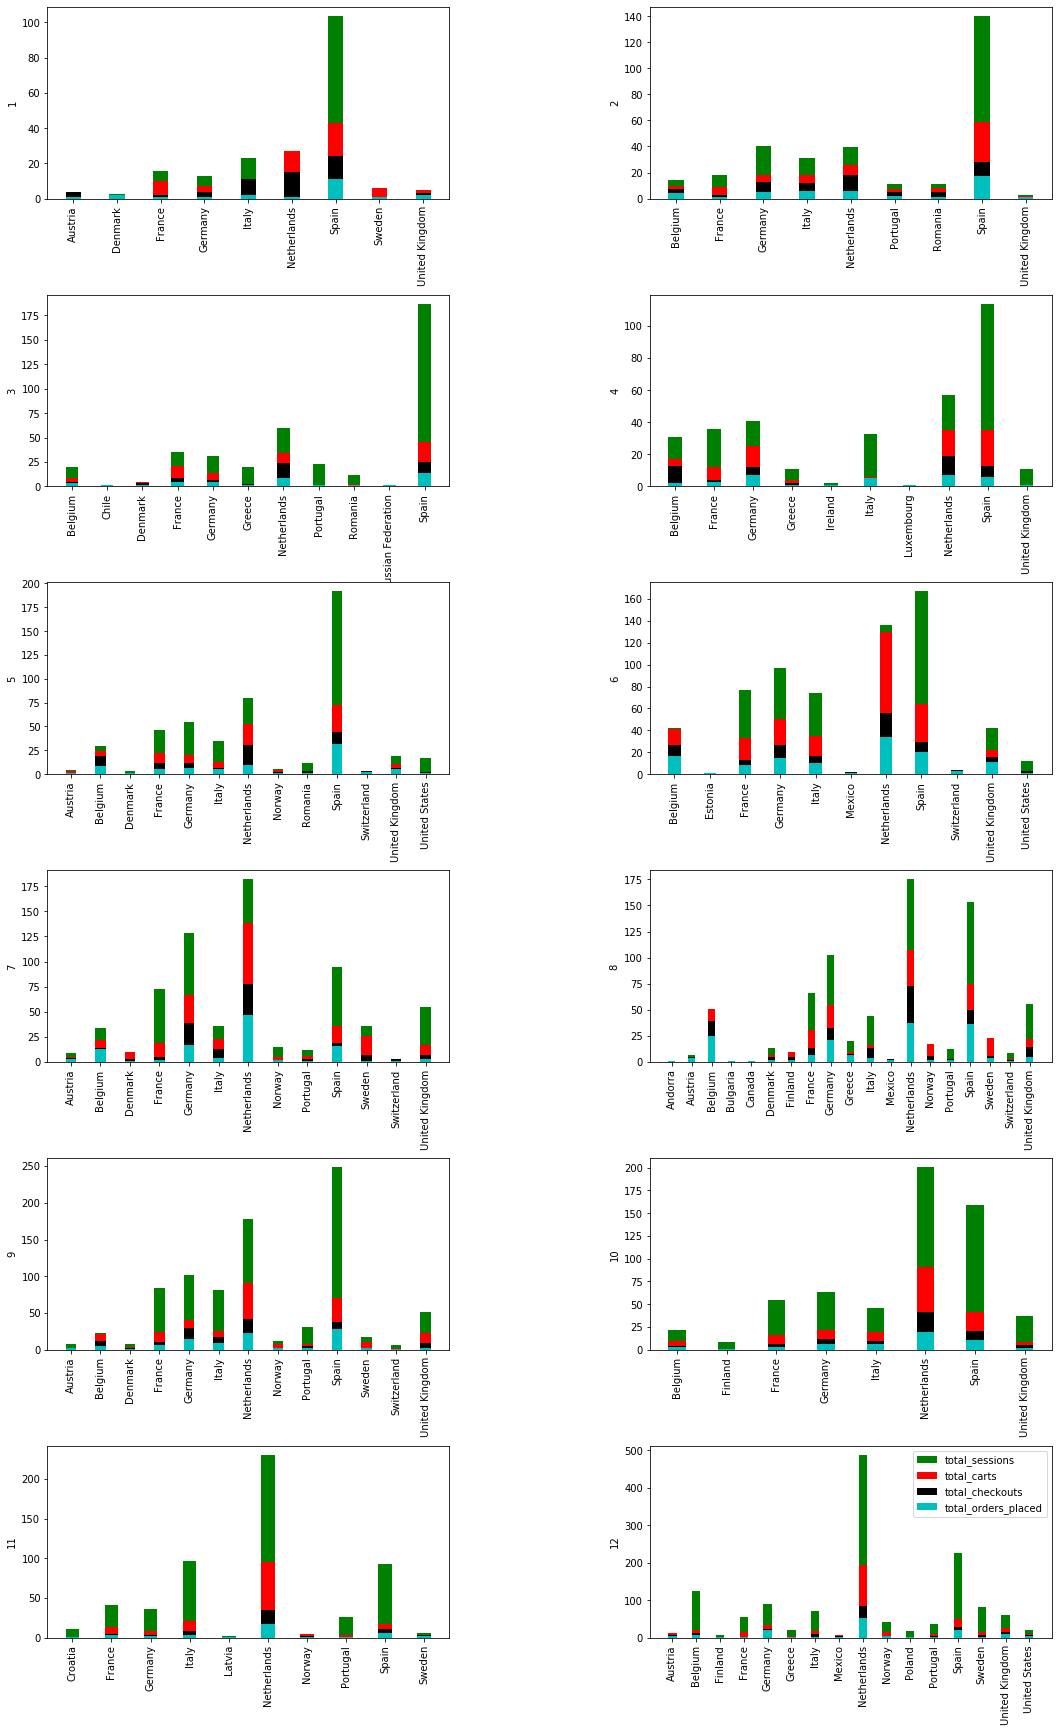

In [65]:
anualReport(schp_y,20)

Apreciaciones:
- No todos los paises han tenido una conversion constante durante todo el año.

#### Visualizacion de la evolucion del numero de compras a lo largo del año.

In [126]:
schp_y_ls.head()

,month,location_country,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
0,2020-01,Spain,2,2,0,0,0.0,0
1,2020-01,Czech Republic,1,1,0,0,0.0,0
2,2020-01,Spain,3,3,0,0,0.0,0
3,2020-01,Austria,1,1,0,0,0.0,0
4,2020-01,Belgium,1,1,0,0,0.0,0


Completar el dataframe con todas las fechas.

In [165]:
schp_y_raw.head()

,month,location_city,location_country,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
0,2020-01,Irún,Spain,2,2,0,0,0.0,0
1,2020-01,Prestice,Czech Republic,1,1,0,0,0.0,0
2,2020-01,La Laguna,Spain,3,3,0,0,0.0,0
3,2020-01,Attendorf,Austria,1,1,0,0,0.0,0
4,2020-01,Torhout,Belgium,1,1,0,0,0.0,0


In [250]:
get_out = fillMounths(schp_y_raw)

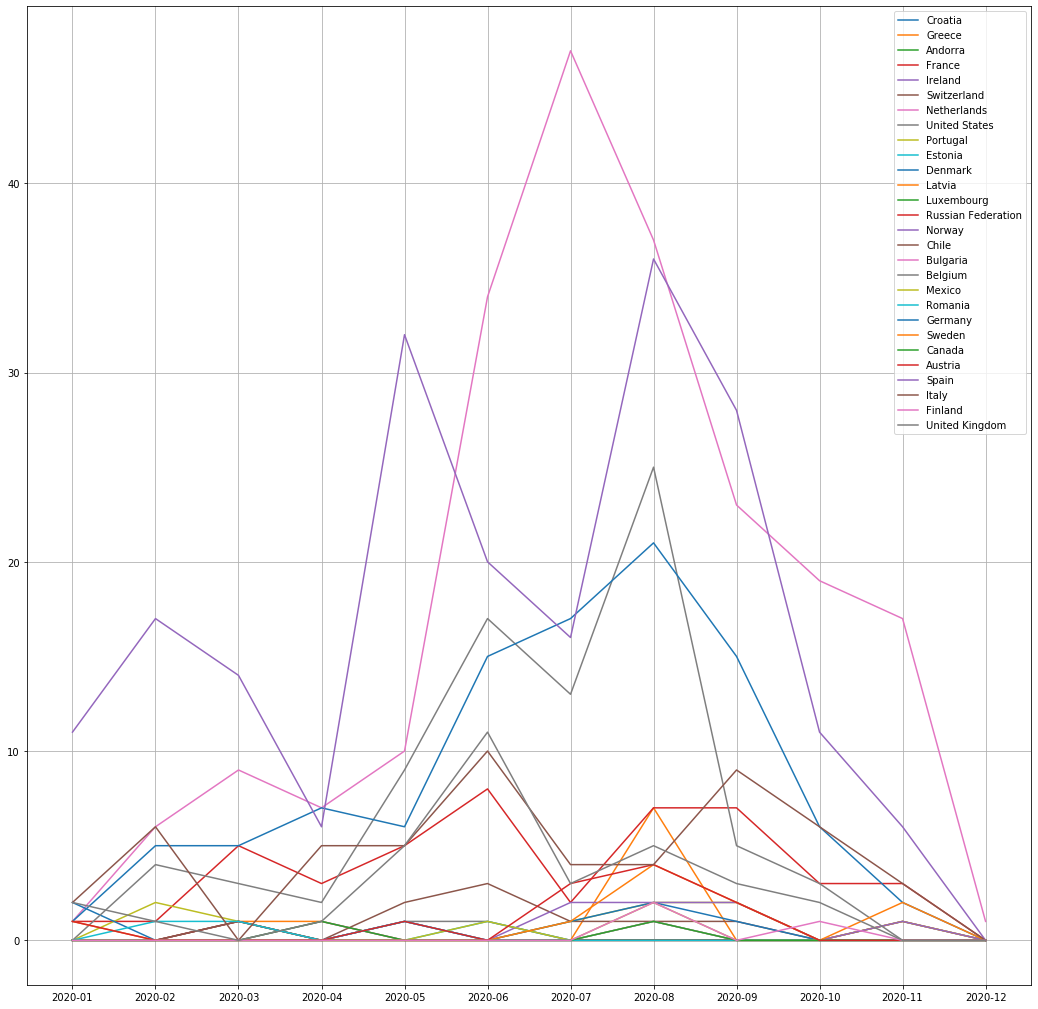

In [256]:
convertEvolution(get_out)

Vemos que dentro del grupo de paises que han tenido al menos un mes con conversion positiva existe una marcada diferencia en el indice de ventas de cada uno.

#### Visualizacion del volumen de ventas de cada pais.

In [262]:
shcY1.head()

,month,location_city,location_country,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
94,2020-01,Nieuw-vennep,Netherlands,3,22,1,1,0.04545,1
120,2020-01,Vienna,Austria,26,33,1,3,0.03030,1
203,2020-01,Majadahonda,Spain,9,15,2,1,0.06666,1
222,2020-01,Frederiksberg,Denmark,2,2,1,1,0.50000,1
273,2020-01,London,United Kingdom,4,4,1,1,0.25000,1


In [338]:
schp_y_gr["total_conversion_abs"] = schp_y_gr["total_orders_placed"] / schp_y_gr["total_sessions"]  
schp_y_gr.head()

,total_visitors,total_sessions,total_conversion,total_orders_placed,total_conversion_abs
location_country,,,,,
Andorra,2,2,0.50000,1,0.500000
Austria,312,422,2.67780,11,0.026066
Belgium,767,1014,12.10697,81,0.079882
Bulgaria,8,10,0.10000,1,0.100000
Canada,1,1,1.00000,1,1.000000


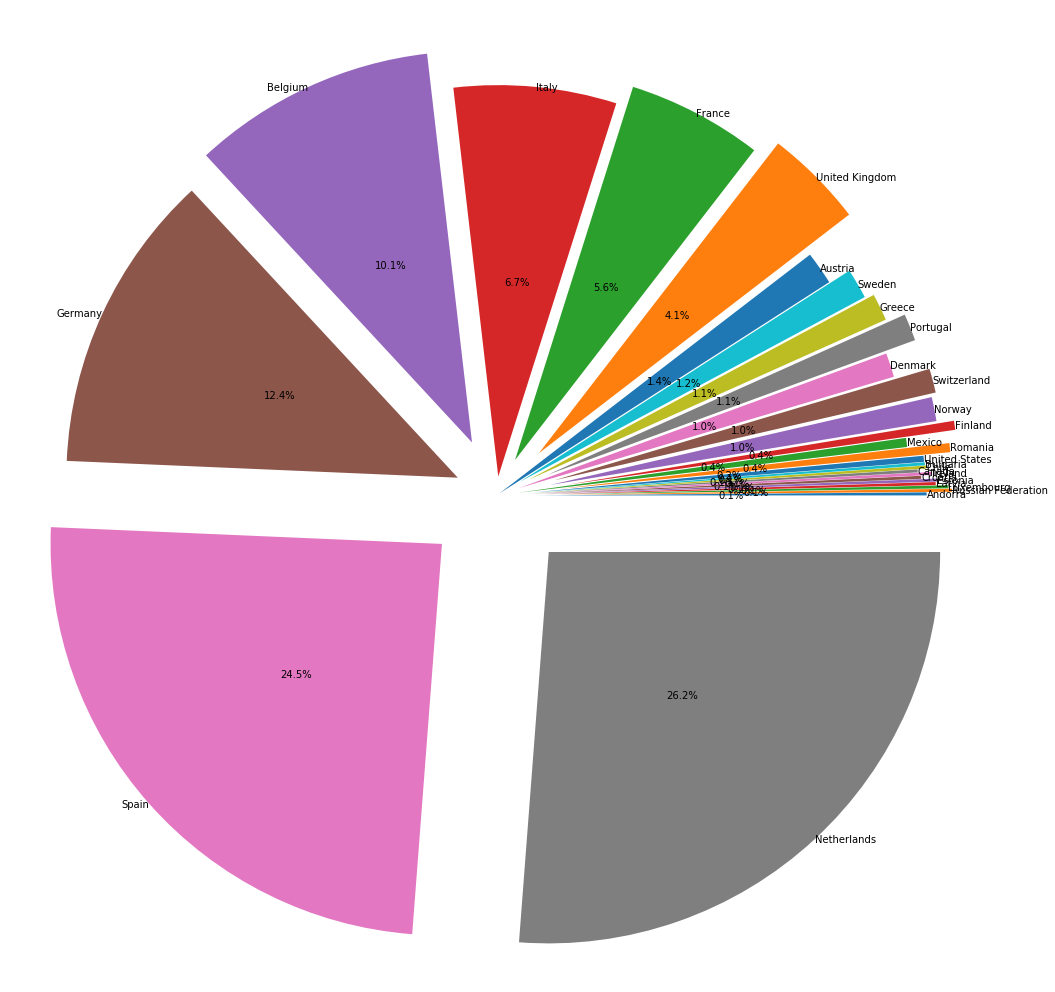

In [325]:
pieChart(schp_y_gr, "total_orders_placed")

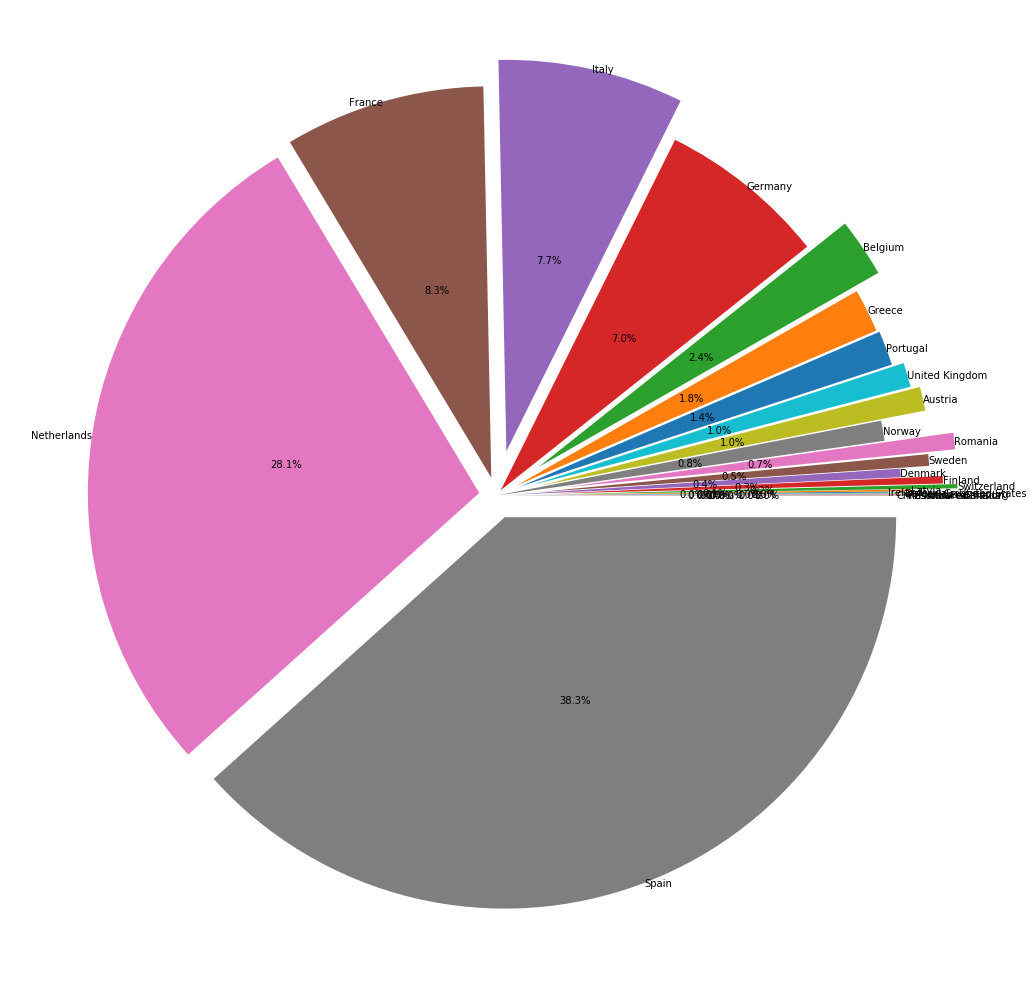

In [339]:
pieChart(schp_y_gr, "total_visitors")

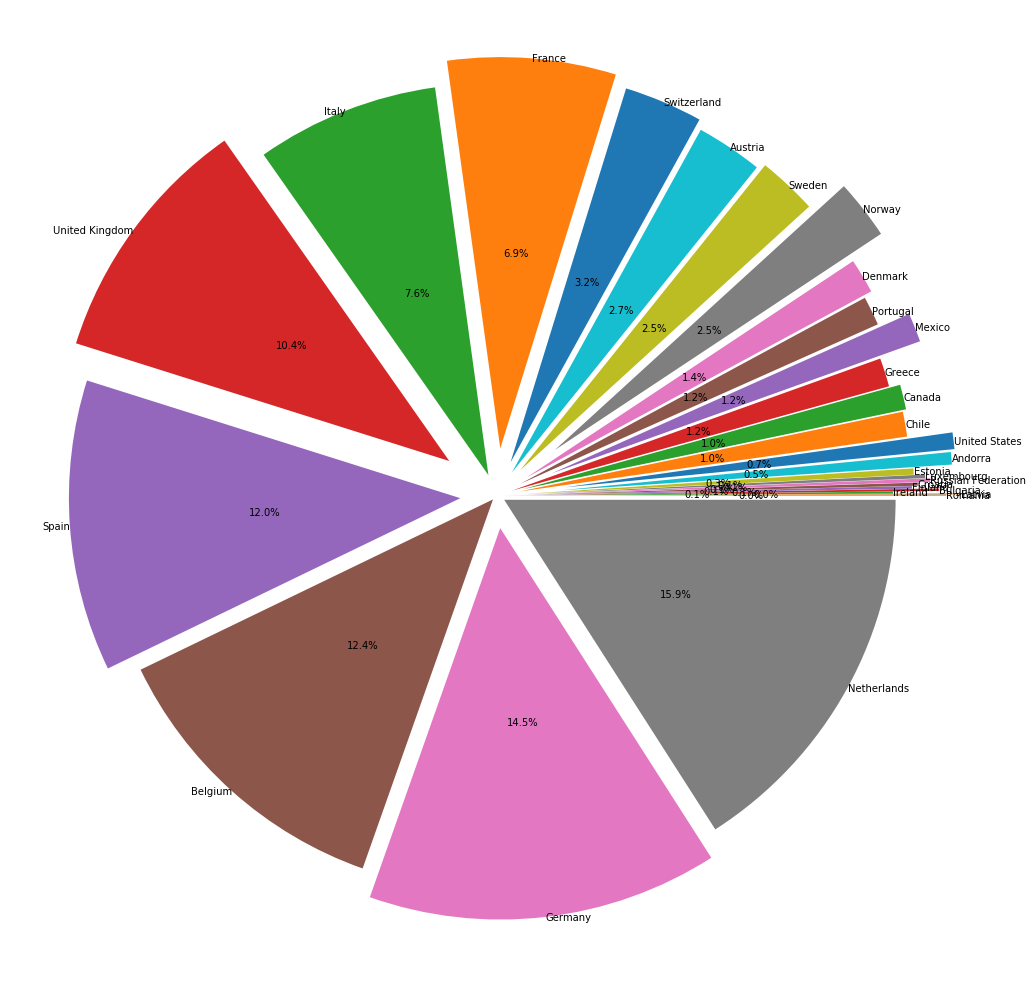

In [326]:
pieChart(schp_y_gr, "total_conversion")

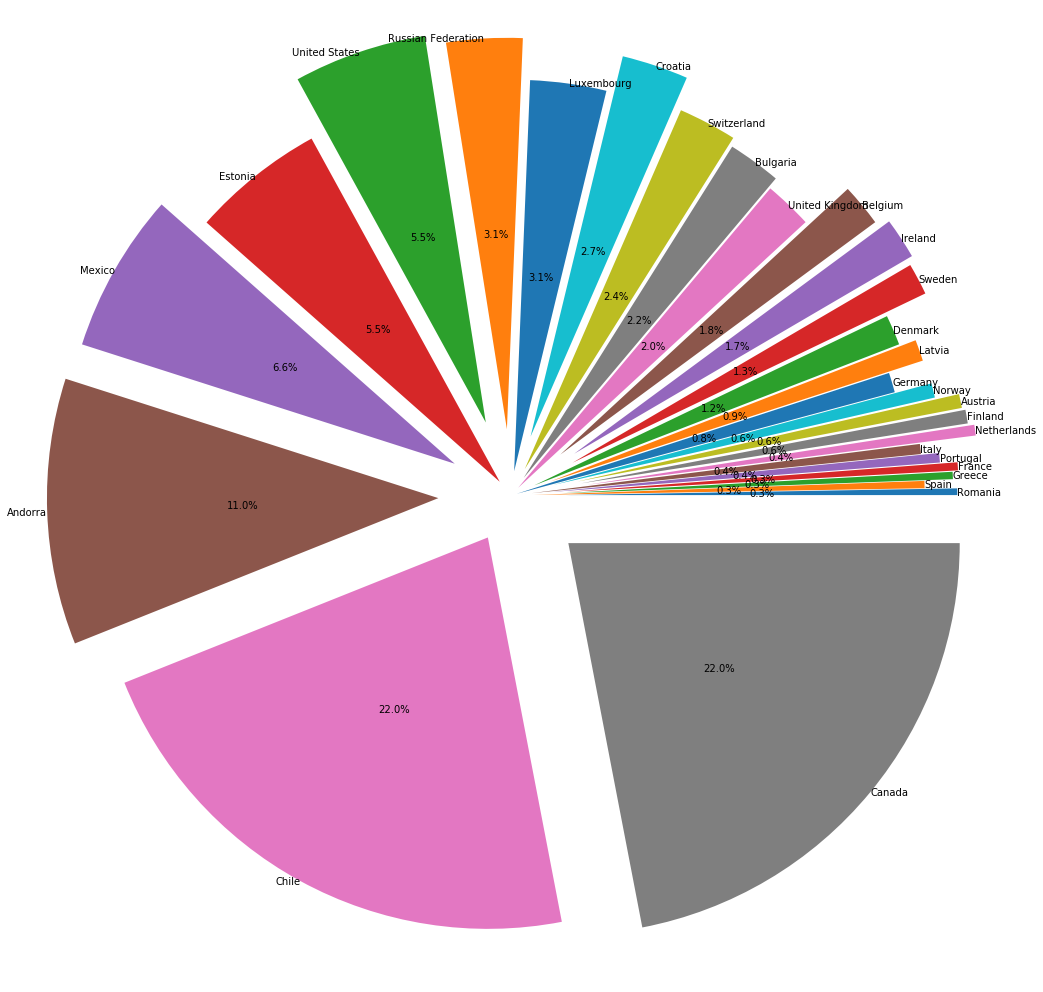

In [327]:
pieChart(schp_y_gr, "total_conversion_abs")

- Como vemos hay una gran diferencia entre el volumen absoluto de ventas y el relativo al numero de sesiones totales.
- Esto puede ser debido a que la distancia entre sesiones y compras es mas pequeña debido a la menor actividad.

In [328]:
schp_y_gr.loc["Canada"]

total_sessions          1.0
total_conversion        1.0
total_orders_placed     1.0
total_conversion_abs    1.0
Name: Canada, dtype: float64

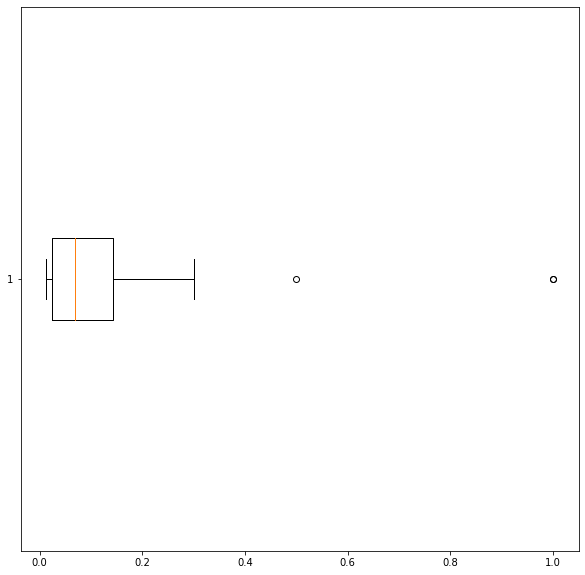

In [340]:
fig, ax = plt.subplots(figsize = (10,10), sharex = True)

plt.boxplot(schp_y_gr["total_conversion_abs"], vert=False)    
plt.show()

Por lo que vamos a visualizar el indice de conversion anual absoluto filtrando por aquellos paises con un volumen de sesiones que consideramos normal.
- Filtramos a partir del volumen de conversiones que se considera normal, es decir por debajo del tercer percentil.

In [342]:
np.percentile(schp_y_gr["total_conversion_abs"], [25, 50, 75])

array([0.02423979, 0.06822344, 0.14285714])

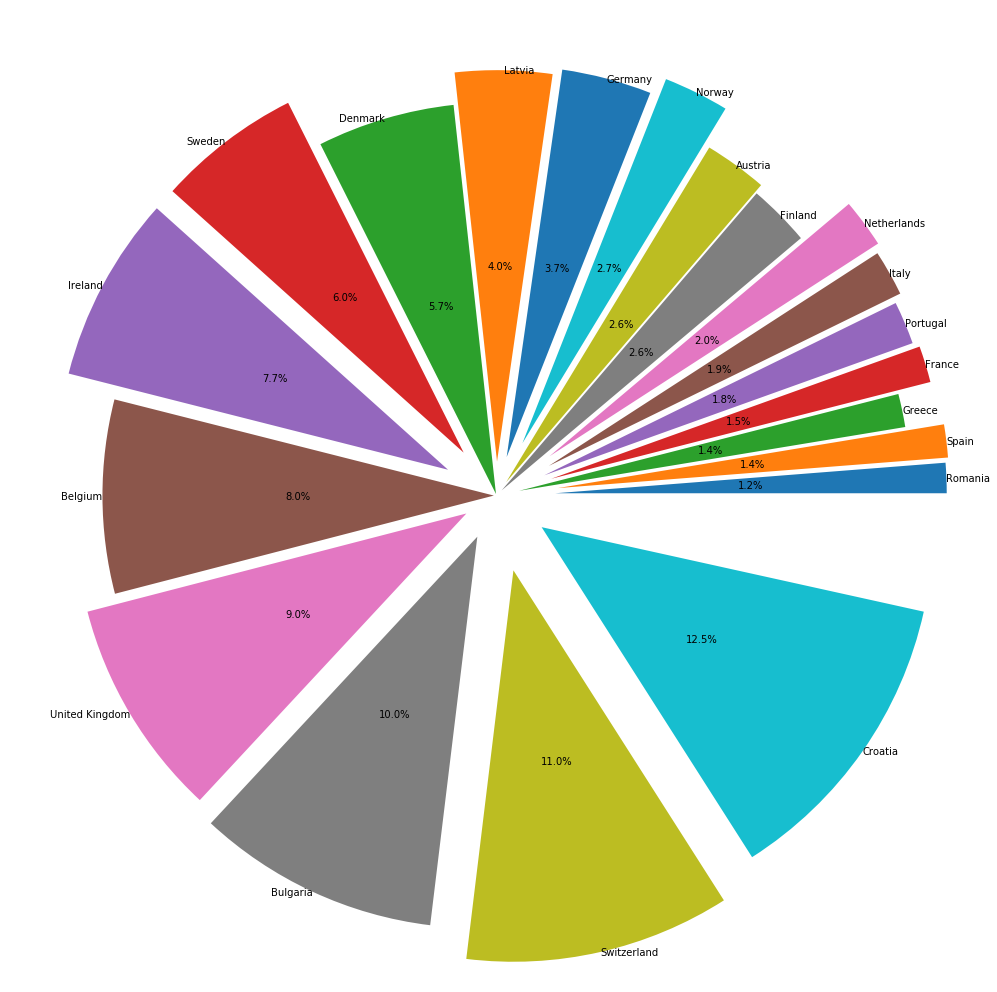

In [343]:
msk_abs_conv = schp_y_gr["total_conversion_abs"] < 0.14285714
slc_cont_abs = schp_y_gr[msk_abs_conv]
pieChart(slc_cont_abs, "total_conversion_abs")

Vamos a obtener otra metrica que nos indique el numero de compras por usuario en cada pais.

In [344]:
schp_y_gr["conversion_user"] = schp_y_gr["total_orders_placed"] / schp_y_gr["total_visitors"]  
schp_y_gr.head()

,total_visitors,total_sessions,total_conversion,total_orders_placed,total_conversion_abs,conversion_user
location_country,,,,,,
Andorra,2,2,0.50000,1,0.500000,0.500000
Austria,312,422,2.67780,11,0.026066,0.035256
Belgium,767,1014,12.10697,81,0.079882,0.105606
Bulgaria,8,10,0.10000,1,0.100000,0.125000
Canada,1,1,1.00000,1,1.000000,1.000000


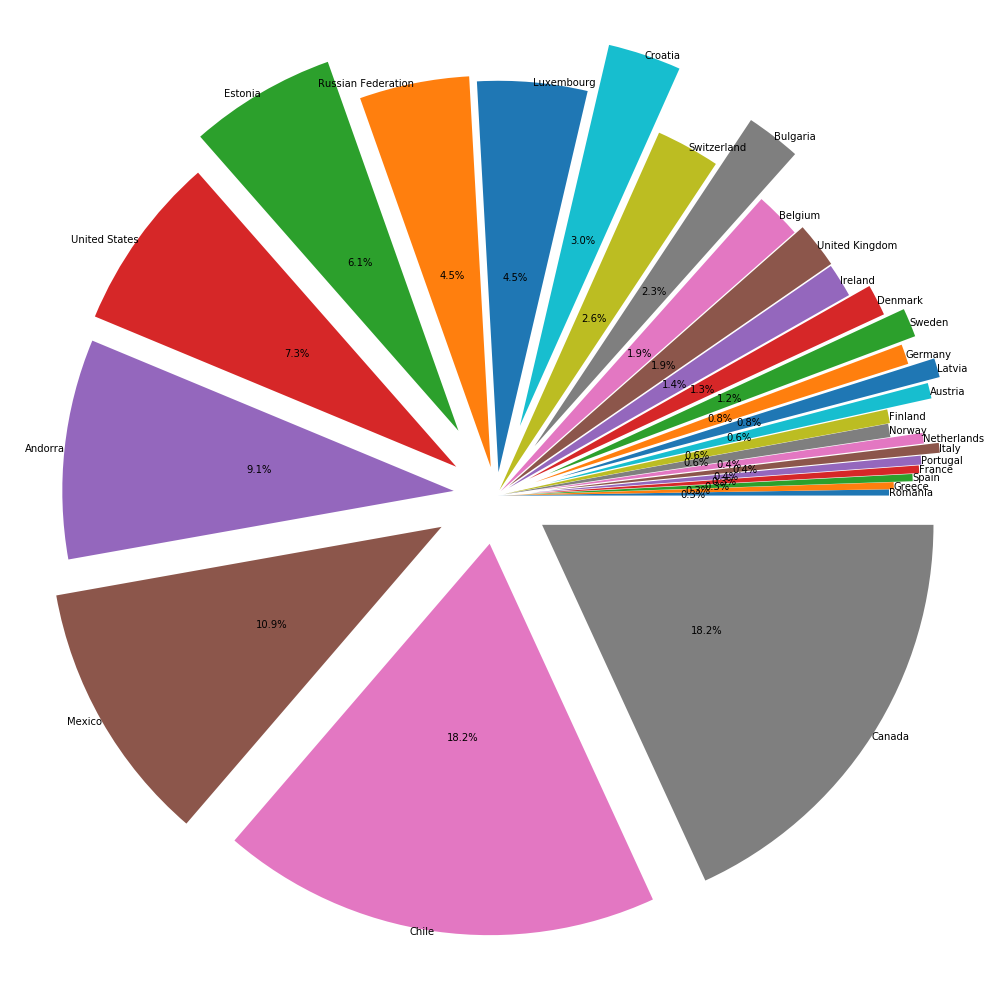

In [346]:
pieChart(schp_y_gr, "conversion_user")

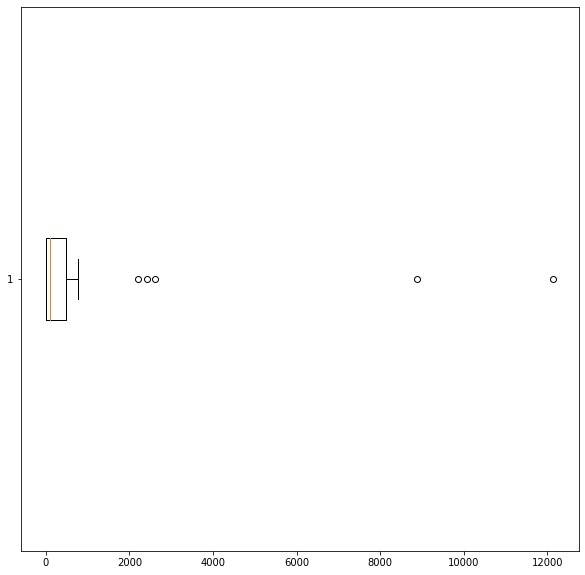

In [347]:
fig, ax = plt.subplots(figsize = (10,10), sharex = True)

plt.boxplot(schp_y_gr["total_visitors"], vert=False)    
plt.show()

In [348]:
np.percentile(schp_y_gr["total_visitors"], [25, 50, 75])

array([  5., 104., 480.])

In [370]:
(slc_cont_abs.loc["Spain"]["conversion_user"]/slc_cont_abs["conversion_user"].sum())*100

6.590319578610458

In [ ]:
(slc_cont_abs.loc["Belgium"]["conversion_user"]/slc_cont_abs["conversion_user"].sum())*100

In [353]:
slc_cont_abs

,total_visitors,total_sessions,total_conversion,total_orders_placed,total_conversion_abs,conversion_user
location_country,,,,,,
Belgium,767,1014,12.10697,81,0.079882,0.105606
France,2622,2988,6.76644,45,0.015060,0.017162
Germany,2207,2696,14.09206,100,0.037092,0.045310
Greece,567,656,1.15293,9,0.013720,0.015873
Italy,2428,2861,7.36241,54,0.018875,0.022241
Netherlands,8883,10531,15.51703,211,0.020036,0.023753
Spain,12143,14471,11.71111,197,0.013613,0.016223


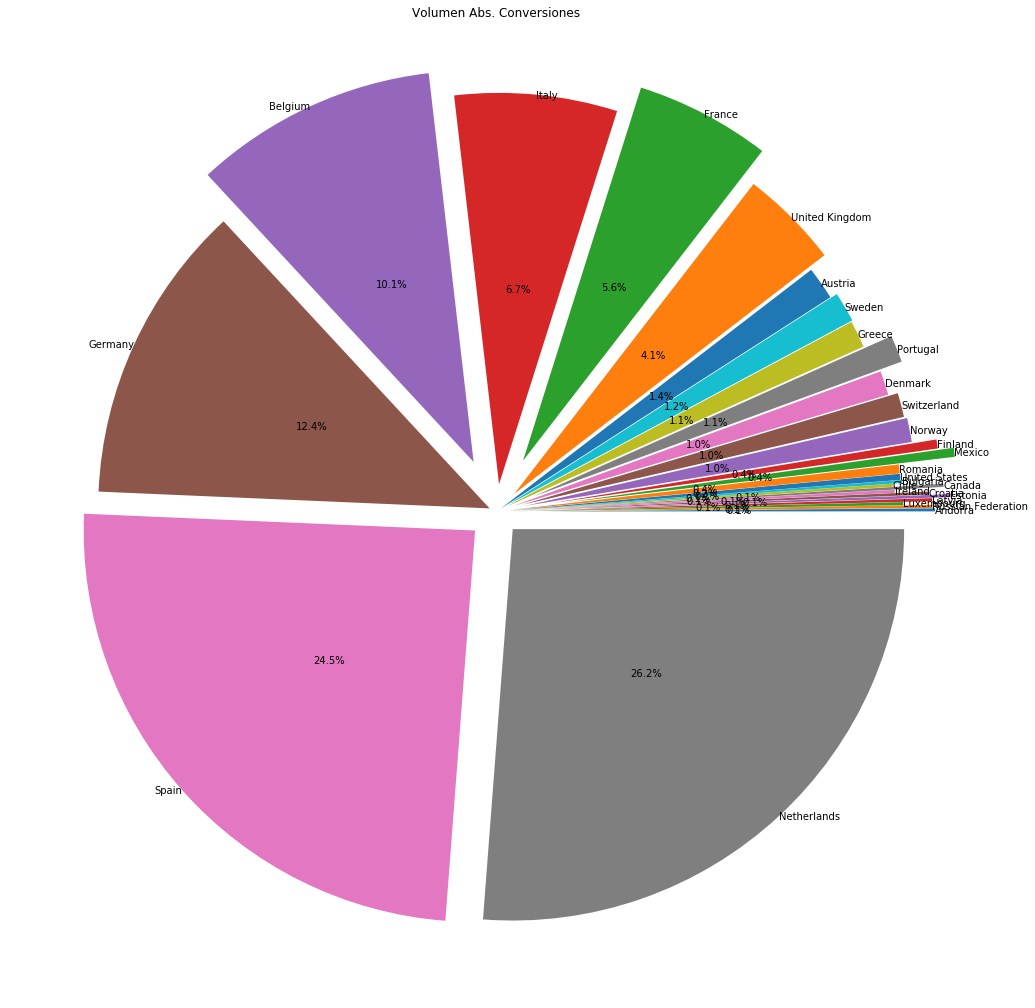

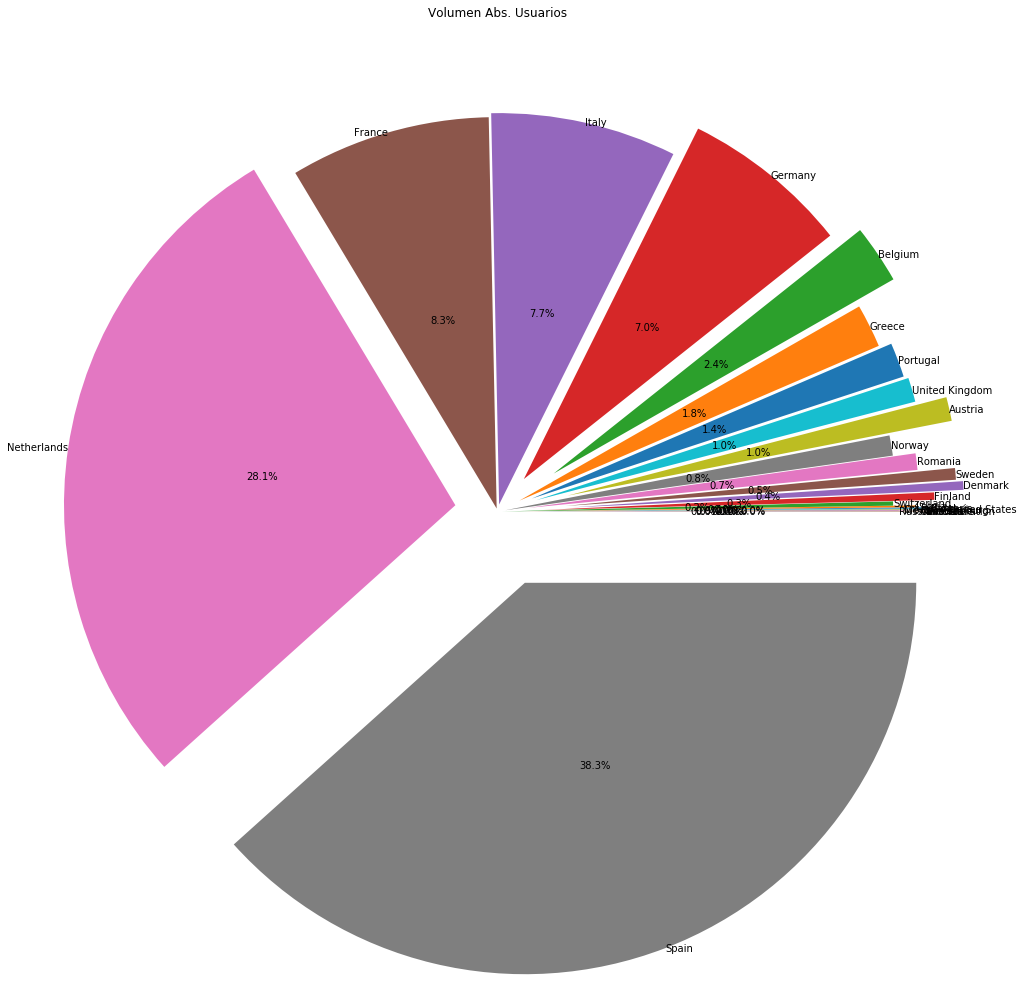

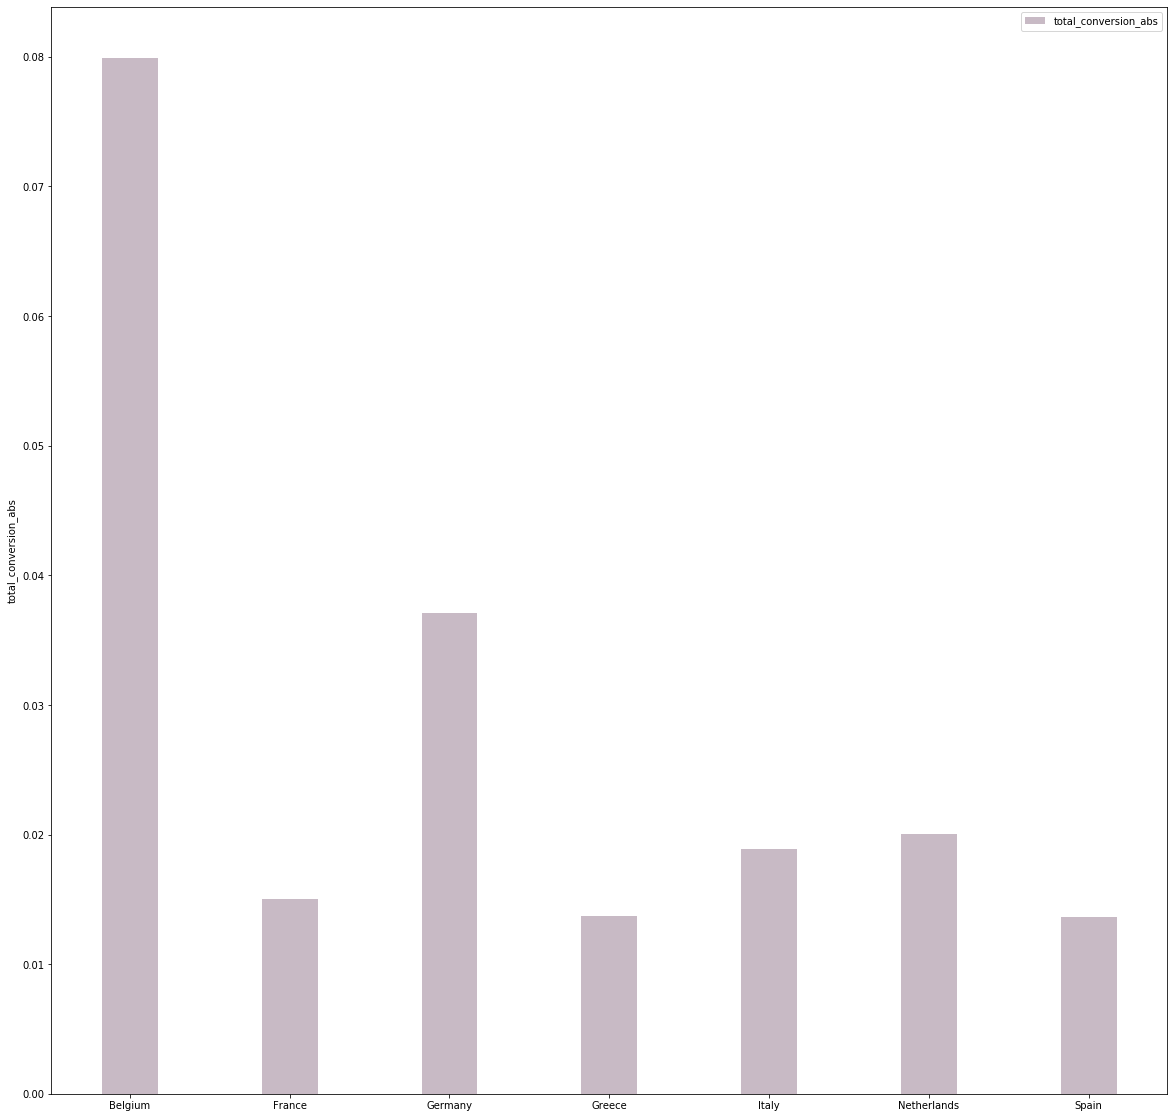

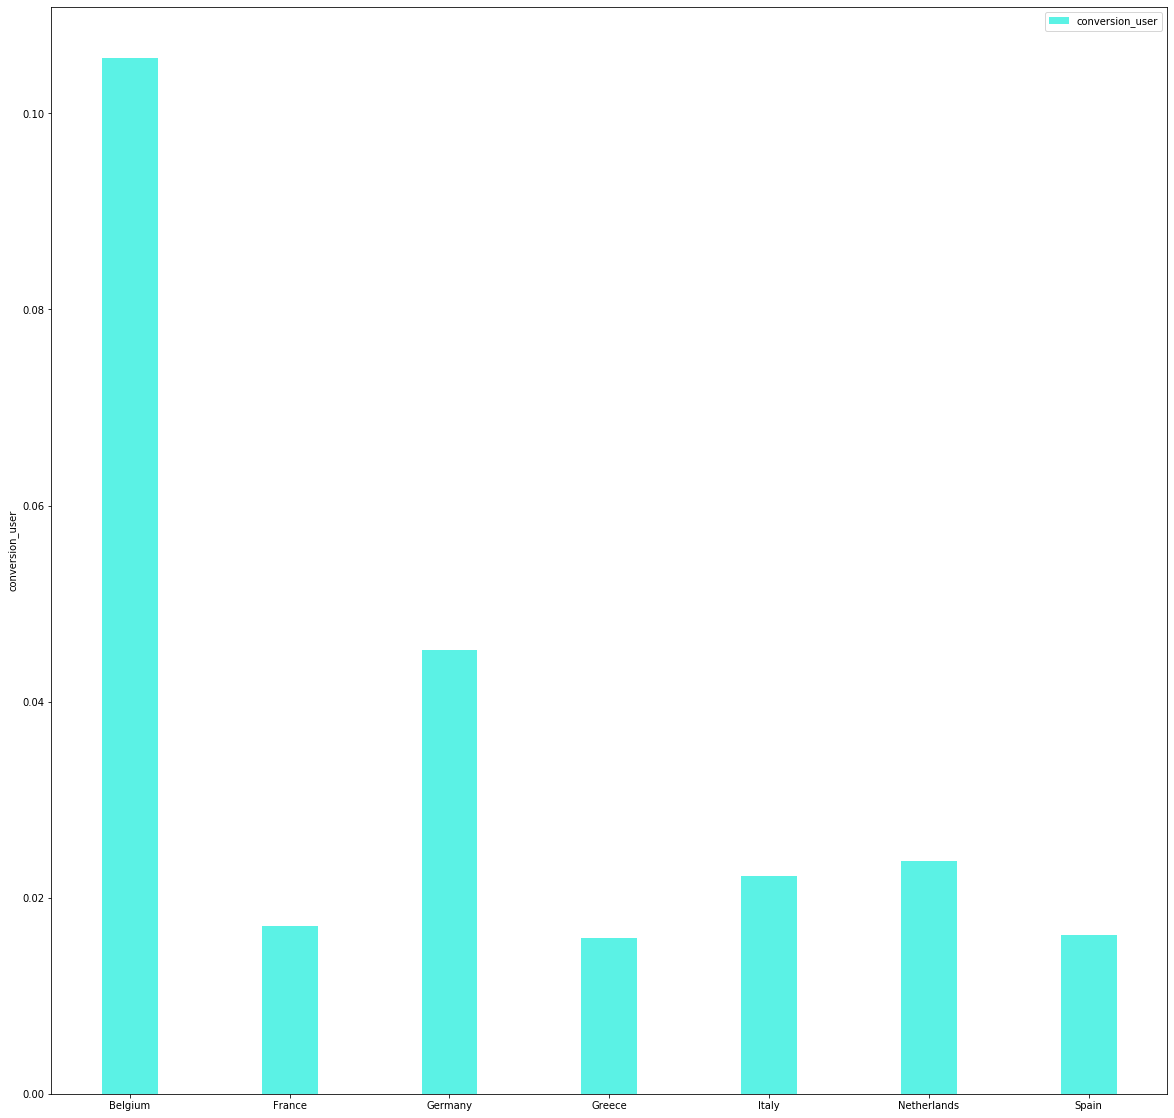

In [382]:
pieInform(schp_y_raw,["location_city","total_carts","total_checkouts","month"])